# Does length of service and employee age affect job satisfaction?
In this project, we will analyse exit surveys from employees of the [Department of Education, Training and Employment](https://en.wikipedia.org/wiki/Department_of_Education_and_Training_(Queensland)) (DETE) and the [Technical and Further Education](https://en.wikipedia.org/wiki/Technical_and_further_education) (TAFE) institute in Queensland, Australia. Our aim is to answer to the following questions:
- are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- are younger employees resigning due to some kind of dissatisfaction? What about older employees?

Data used in this project:
- [DETE exit survey data](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey)
- [TAFE exit survey data](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey)

We will be combining the data from both departments to try and answer these questions. However, although both used the same survey template, one of them customised some of the answers. This will require a degree of cleaning before we can combine the two datasets.

A data dictionary has not been provided for this dataset, so we will do our best to infer the definitions of each column from its name. Here is a preview of some of the columns from two datasets:

**DETE**

| Column      | Description |
| ----------- | ----------- |
| ID      |    An id used to identify the participant of the survey    |
| SeparationType   |  The reason why the person's employment ended      |
|   Cease Date |    The year or month the person's employment ended    |
|DETE Start Date|    The year the person began employment with the DETE    |

**TAFE**

| Column      | Description |
| ----------- | ----------- |
|  Record ID  |  An id used to identify the participant of the survey      |
|  Reason for ceasing employment  | The reason why the person's employment ended       |
|  LengthofServiceOverall. Overall Length of Service at Institute (in years) |  The length of the person's employment (in years)       |

In [49]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# run Jupyter magic so that plots are displayed inline
%matplotlib inline  

## Read and explore the datasets

In [50]:
# read DETE dataset and explore dataframe
dete_survey = pd.read_csv("dete_survey.csv")
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [51]:
# explore first 5 rows
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [52]:
# read TAFE dataset and explore dataframe
tafe_survey = pd.read_csv("tafe_survey.csv")
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [53]:
# explore first 5 rows
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


From our initial exploration, we can see that:
- the `dete_survey` dataframe contains instances of the string `'Not Stated'` to indicate where a value is missing, however missing values should be represented as `NaN`
- both `dete_survey` and `tafe_survey` contain many columns that we do not need to complete our analysis, and so can be dropped
- both dataframes contain columns that are used to store the same information but under different names (e.g. `Cease Date` and `CESSATION YEAR`), we will need to ensure these columns have the exact same name before combining the dataframes
- there are several columns that contain information around why an employee might resign

## Data cleaning

### NaN values and dropping columns

In [54]:
# read DETE dataset again, this time utilising the na_values parameter
dete_survey = pd.read_csv("dete_survey.csv", na_values="Not Stated")

The above code will ensure that any missing values labelled as `Not Stated` will be imported as `NaN`.

Let's drop columns from both dataframes that are not necessary for our analysis, this will make our data much more manageable and easier to work with.

In [55]:
# drop unneeded columns from DETE dataset
dete_drop_cols = dete_survey.columns[28:49]
dete_survey_updated = dete_survey.drop(columns=dete_drop_cols, axis=1)

# drop unneeded columns from TAFE dataset
tafe_drop_cols = tafe_survey.columns[17:66]
tafe_survey_updated = tafe_survey.drop(columns=tafe_drop_cols, axis=1)

### Standardising column names
Below are some of the columns we'd like to use for our final analysis. Since we want to combine our dataframes, we will need to try and standardise the column names between the dataframes.

| dete_survey      | tafe_survey |   Definition |
| ----------- | ----------- | -------------- |
|  ID | Record ID |  An id used to identify the participant of the survey      |
| SeparationType |  Reason for ceasing employment  | The reason why the person's employment ended       |
| Cease Date |  LengthofServiceOverall. Overall Length of Service at Institute (in years) |  The length of the person's employment (in years)       |
| DETE Start Date |   |  	The year the participant began employment with the DETE       |
| |  LengthofServiceOverall.Overall Length of Service at Institute (in years) |  	The length of the person's employment (in years)      |
| Age |  CurrentAge.Current Age |  	The age of the participant      |
| Gender |  Gender.What is your Gender? |  	The gender of the participant     |

In [56]:
# standardise column names in DETE dataframe
dete_survey_updated.columns = (dete_survey_updated.columns
                                                       .str.lower()
                                                       .str.strip()
                                                       .str.replace(" ", "_")
                              )

# verify updated column names
print(dete_survey_updated.columns)

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')


In [57]:
# rename columns in TAFE dataframe to match equivalents in the DETE dataframe
# NOTE we will handle the remaining column names later
col_map = {
    'Record ID': 'id',
    'CESSATION YEAR': 'cease_date',
    'Reason for ceasing employment': 'separationtype',
    'Gender. What is your Gender?': 'gender',
    'CurrentAge. Current Age': 'age',
    'Employment Type. Employment Type': 'employment_status',
    'Classification. Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
}

tafe_survey_updated.rename(mapper=col_map, axis=1, inplace=True)

# verify updated column names
print(tafe_survey_updated.columns)

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')


### Removing more data
If we recall the questions we are trying to answer:
- are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- are younger employees resigning due to some kind of dissatisfaction? What about older employees?

We are only interested in when an employee *resigns*. Let's take a look at the unique values in the `separationtype` column of the DETE dataset.

In [58]:
dete_survey_updated["separationtype"].value_counts(dropna=False)

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

We can see that there are only three values in the `separationtype` column that are necessary to our analysis:
- `Resignation-Other reasons`
- `Resignation-Other employer`
- `Resignation-Move overseas/interstate`

Therefore we can discard any rows that do not contain the the string `'Resignation'`.

In [59]:
# bool mask for any string containing 'Resignation'
bool_mask = dete_survey_updated["separationtype"].str.contains("Resignation", na=False)

# apply mask to dataframe, ensuring a copy is created to avoid SettingWithCopy warning
dete_resignations = dete_survey_updated.loc[bool_mask].copy()

# verify changes
dete_resignations["separationtype"].value_counts()

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

Let's try the same thing with the TAFE dataset.

In [60]:
# identify unique values in column
tafe_survey_updated["separationtype"].value_counts(dropna=False)

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: separationtype, dtype: int64

We can see that there is one `NaN` value in the column. Since we have no way of knowing if this employee resigned or not, we will set the `na` parameter of `.str.contains()` to `False`, so that when we apply the mask to create our new dataframe it will be excluded.

In [61]:
# we can use the same boolean mask as before
bool_mask = tafe_survey_updated["separationtype"].str.contains("Resignation", na=False)

# apply mask to dataframe, ensuring a copy is created to avoid SettingWithCopy warning
tafe_resignations = tafe_survey_updated.loc[bool_mask].copy()

# verify changes
tafe_resignations["separationtype"].value_counts()

Resignation    340
Name: separationtype, dtype: int64

### Cleaning date information

We need to check that our data doesn't contain any major inconsistencies. Let's focus on veryfying the years in the `cease_date` and `dete_start_date` columns to ensure they make sense.

Since the `cease_date` is the last year of the person's employment and the `dete_start_date` is the person's first year of employment, it wouldn't make sense to have years after the current date.

Given that most people in this field start working in their 20s, it's also unlikely that the `dete_start_date` was before the year 1940.

#### DETE dataset
Let's focus on verifying that the years in the `cease_date` and `dete_start_date` columns make sense.

In [62]:
# check the unique values in the cease_date column
dete_resignations["cease_date"].value_counts().sort_index(ascending=True)

01/2014     22
05/2012      2
05/2013      2
06/2013     14
07/2006      1
07/2012      1
07/2013      9
08/2013      4
09/2010      1
09/2013     11
10/2013      6
11/2013      9
12/2013     17
2010         1
2012       126
2013        74
Name: cease_date, dtype: int64

We don't really have any need to keep the month of resignation so we can strip that out leaving just the year.

In [63]:
# create a copy to work on
cease_date_copy = dete_resignations["cease_date"].copy()

# remove any month digits and forward slash
clean_cease_date = cease_date_copy.str.replace(r'([0-1][0-9]\/)', "")

# convert values from string to float
clean_cease_date = clean_cease_date.astype(float)

# verify column
print(clean_cease_date.value_counts())

# assign back to original column
dete_resignations["cease_date"] = clean_cease_date

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64


1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
NaN       28
Name: dete_start_date, dtype: int64


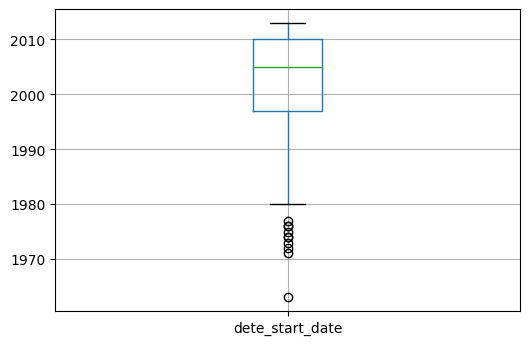

In [64]:
print(dete_resignations["dete_start_date"].value_counts(dropna=False).sort_index(ascending=True))
dete_resignations.boxplot("dete_start_date")

The data in the `dete_start_date` column looks fine, no need to make any modifications.

#### TAFE dataset
We only have one date column in the TAFE dataset, `cease_date`. Let's take a look.

In [65]:
tafe_resignations["cease_date"].value_counts().sort_index(ascending=True)

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

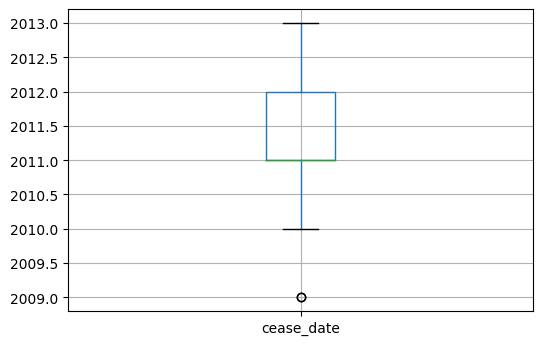

In [66]:
tafe_resignations.boxplot("cease_date")

There doesn't appear to be any issues with the data in the `cease_date` column of the `tafe_resignations` dataframe. One thing to note though is that the years in each dataframe don't quite span the same number of years.

### Determine length of service
In the `tafe_resignations` dataframe we have a column called `institute_service` which indicates the length of time an employee worked at the TAFE institute. The `dete_resignation` dataframe does not have such a column, so we will need to create one as this information is essential to answer the question:
- Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

In [67]:
# calculate length of service and store data in a new column with matching name
dete_resignations["institute_service"] = dete_resignations["cease_date"] - dete_resignations["dete_start_date"]

# check first 5 rows
dete_resignations[["dete_start_date", "cease_date", "institute_service"]].head()

,dete_start_date,cease_date,institute_service
3,2005.0,2012.0,7.0
5,1994.0,2012.0,18.0
8,2009.0,2012.0,3.0
9,1997.0,2012.0,15.0
11,2009.0,2012.0,3.0


Looks like our new `institute_service` column has functioned as intended.

### Identify dissatisfied employees

Now it's time to identify any employees who resigned due to dissatisfaction. We will use the following columns from each dataframe to do this:

**`tafe_resignations`**
- `Contributing Factors. Dissatisfaction`
- `Contributing Factors. Job Dissatisfaction`

**`dete_survey_updated`**
- `job_dissatisfaction`
- `dissatisfaction_with_the_department`
- `physical_work_environment`
- `lack_of_recognition`
- `lack_of_job_security`
- `work_location`
- `employment_conditions`
- `work_life_balance`
- `workload`

If any employees indicated any of the factors above caused them to resign, we'll mark them as `True` in a new column called `dissatisfied`.

We'll start with the `tafe_resignations` dataframe as there are fewer columns to deal with.

#### TAFE dataset

In [68]:
# inspect values in each column (including any null values)
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False), "\n")

print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False))

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64 

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


It looks like `-` represents where dissatisfaction was not the reason for unemployment, while the name of the column itself has been used as the value to represent that the employee was dissastified. We can see that `NaN` values are also present in both columns.

Let's update these values to:
- `True` when the employee was dissastified
- `False` when the employee was not dissastified
- `NaN` if the value is `NaN`

In [69]:
# create function to update the column values as specified above
def update_vals(value):
    if pd.isnull(value):
        return np.nan
    elif value == "-":
        return False
    return True

# list of columns we want to apply the function to
cols = ["Contributing Factors. Dissatisfaction", "Contributing Factors. Job Dissatisfaction"]

# apply the function elementwise to both columns and assign transformations back to the respective columns
tafe_resignations[cols] = tafe_resignations[cols].applymap(update_vals)

# inspect both columns again
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False), "\n")
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False))

False    277
True      55
NaN        8
Name: Contributing Factors. Dissatisfaction, dtype: int64 

False    270
True      62
NaN        8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


Looks like our function worked as expected. Now that the column values have been updated, we can create the `dissastisfied` column and use the method `df.any()` to apply a value to the column. `df.any()` will do the following:

- Return `True` if any element in the selected columns above is `True`
- Return `False` if none of the elements in the selected columns above is `True`
- Return `NaN` if the value is `NaN`

In [70]:
# select columns in tafe_resignations that may indicate employee disatisfaction
cols = [
    "Contributing Factors. Dissatisfaction", 
    "Contributing Factors. Job Dissatisfaction",
]

# use df.any() to identify if any of these columns contain 'True' and assign this to new column
tafe_resignations["dissatisfied"] = tafe_resignations[cols].any(axis=1, skipna=False)

# sense check the new column
cols.append("dissatisfied")
tafe_resignations[cols].head(15)

,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,dissatisfied
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False
10,False,False,False
13,False,False,False
14,True,True,True


Looks like that worked, the `dissatisfied` column contains `True` if either of the other two columns contain `True`. Now let's attempt the same process for the `dete_resignations` dataframe.

#### DETE dataset

In [71]:
# select columns in dete_resignations that may indicate employee disatisfaction
cols = [
    "job_dissatisfaction",
    "dissatisfaction_with_the_department",
    "physical_work_environment",
    "lack_of_recognition",
    "lack_of_job_security",
    "work_location",
    "employment_conditions",
    "work_life_balance",
    "workload"
]

# use df.any() to identify if any of these columns contain 'True' and assign this to new column 
dete_resignations["dissatisfied"] = dete_resignations[cols].any(axis=1, skipna=False)

# sense check the new column
cols.append("dissatisfied")
dete_resignations[cols].head(15)

,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,work_life_balance,workload,dissatisfied
3,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,True,False,False,True
8,False,False,False,False,False,False,False,False,False,False
9,True,True,False,False,False,False,False,False,False,True
11,False,False,False,False,False,False,False,False,False,False
12,False,False,False,False,False,False,False,False,False,False
14,True,True,False,False,False,False,False,False,False,True
16,False,False,False,True,False,False,False,False,False,True
20,False,False,False,False,False,False,False,False,False,False
21,False,False,False,False,False,False,False,False,False,False


Now we have a functional `dissatisfied` column in the DETE dataset too. We're ready to combine our dataframes.

### Combining dataframes

In [72]:
# create a copy of the results for both datasets and assign to a new variable
# this will avoid a potential SettingWithCopy warning
tafe_resignations_up = tafe_resignations.copy()
dete_resignations_up = dete_resignations.copy()

# create new column in each dataframe to indiciate the institute
# this will make it easy to distinguish between the two datasets after combining
tafe_resignations_up["institute"] = "TAFE"
dete_resignations_up["institute"] = "DETE"

# combine dataframes vertically using pd.concat() function
combined = pd.concat([tafe_resignations_up, dete_resignations_up], ignore_index=True)

# identify shape of combined dataframe for reference
print("Combined shape:", combined.shape)

Combined shape: (651, 53)


Now both our dataframes are combined into one dataframe called `combined`. We achieved this by using the `concat()` function to combine our two orignal dataframes along the vertical axis with an outer join, meaning that all data from both dataframes is preserved. For example, if the DETE dataframe contained a column that couldn't be matched in the TAFE dataframe, any rows  from the TAFE dataframe would be updated to contain `NaN` for this column in `combined`. The same applies vice-versa.

As there are several columns from both dataframes that have no corresponding column, we probably have a large number of `NaN` values in our combined dataframe. Let's take a look.

In [73]:
# get sum of NaN in each column of combined dataframe
check_null = combined.isnull().sum()
# filter out any columns with no null values and print remaining columns
null_cols = check_null.loc[check_null != 0]
print(null_cols)

Institute                                              311
WorkArea                                               311
cease_date                                              16
Contributing Factors. Career Move - Public Sector      319
Contributing Factors. Career Move - Private Sector     319
Contributing Factors. Career Move - Self-employment    319
Contributing Factors. Ill Health                       319
Contributing Factors. Maternity/Family                 319
Contributing Factors. Dissatisfaction                  319
Contributing Factors. Job Dissatisfaction              319
Contributing Factors. Interpersonal Conflict           319
Contributing Factors. Study                            319
Contributing Factors. Travel                           319
Contributing Factors. Other                            319
Contributing Factors. NONE                             319
gender                                                  59
age                                                     

### Dropping more columns
Looks like there are multiple columns in the `combined` dataframe that contain significantly large numbers of null values. We know from looking at the shape of `combined` that it has `651` rows. Let's drop any columns with less than `500` **non-null** values. That should remove any columns which did not have a corresponding column in the other dataframe.

In [74]:
tafe_resignations.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service', 'dissatisfied'],
      dtype='object')

In [75]:
# drop any columns with less than 500 non-null values using thresh parameter
combined_updated = combined.dropna(thresh=500, axis=1)

# identify shape again
print("Combined updated shape:", combined_updated.shape)
combined_updated

Combined updated shape: (651, 10)


,id,cease_date,separationtype,gender,age,employment_status,position,institute_service,dissatisfied,institute
0,6.341399e+17,2010.0,Resignation,NaN,NaN,NaN,NaN,NaN,False,TAFE
1,6.341466e+17,2010.0,Resignation,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,False,TAFE
2,6.341475e+17,2010.0,Resignation,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,False,TAFE
3,6.341520e+17,2010.0,Resignation,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,False,TAFE
4,6.341537e+17,2010.0,Resignation,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,False,TAFE
...,...,...,...,...,...,...,...,...,...,...
646,8.100000e+02,2013.0,Resignation-Other reasons,Female,26-30,Permanent Part-time,Teacher Aide,3,False,DETE
647,8.170000e+02,2014.0,Resignation-Other employer,Male,21-25,Permanent Full-time,Teacher,2,False,DETE
648,8.180000e+02,2014.0,Resignation-Move overseas/interstate,Female,21-25,Permanent Full-time,Teacher,2,False,DETE
649,8.210000e+02,2014.0,Resignation-Move overseas/interstate,Female,31-35,Permanent Full-time,Public Servant,5,True,DETE


Using the `df.dropna()` method, we removed 43 columns from our dataset, leaving us with a much more managebale total of 10 columns.

### Cleaning the `institute_service` column and categorising length of service
 We will need to clean up the `institute_service` column as it contains values in a couple of different forms. Notably some values represent a range of years rather than just an absolute number of years.

In [76]:
# check unique values in institute service column
combined_updated["institute_service"].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
20.0                   7
15.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
16.0                   5
18.0                   5
11.0                   4
24.0                   4
23.0                   4
19.0                   3
21.0                   3
39.0                   3
32.0                   3
25.0                   2
26.0                   2
28.0                   2
30.0                   2
36.0                   2
27.0                   1


To make our analysis easier, we'll convert these numbers into categories. We'll base our analysis on this [article from BusinessWire](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), which posits that understanding employee's needs according to their career stage is more effective that trying to do so by their age.

We'll use a slightly modified set of the article's definitions:

- **New:** Less than 3 years at a company
- **Experienced:** 3-6 years at a company
- **Established:** 7-10 years at a company
- **Veteran:** 11 or more years at a company

Now that we have our definitions, let's categorise the values in the `institute_service` column. There are two main steps we need to do this:
1. extract the years of service from each value in the `institute_service` column
2. create a function that maps each year to one of the career stages listed above, and then apply this function to the column

A note on extraction: for any values that represent a range of years, we will take the lower limit of the range. The only exception to this is the value `Less than 1 year`, which we consider as just `1` year of service.

In [77]:
## Step 1: extract the years of service from each value  ## 

# create copy of combined_updated to avoid SettingsWithCopy error
combined_clean = combined_updated.copy()

# convert institute_service dtype to string and extract first instance of regex match -
# for any values that represent a range of years, this will take the lower limit of the range
combined_clean["institute_service"] = (combined_updated["institute_service"]
                                                                           .astype('str')
                                                                           .str.extract(r"(\d+)")
                                       )

# convert values to floats
combined_clean["institute_service"] = combined_clean["institute_service"].astype('float')

# check extraction has worked as expected
print("Check extracted values: \n")
print(combined_clean["institute_service"].value_counts(dropna=False).sort_index(ascending=True))

Check extracted values: 

0.0      20
1.0     159
2.0      14
3.0      83
4.0      16
5.0      56
6.0      17
7.0      34
8.0       8
9.0      14
10.0      6
11.0     30
12.0      6
13.0      8
14.0      6
15.0      7
16.0      5
17.0      6
18.0      5
19.0      3
20.0     17
21.0      3
22.0      6
23.0      4
24.0      4
25.0      2
26.0      2
27.0      1
28.0      2
29.0      1
30.0      2
31.0      1
32.0      3
33.0      1
34.0      1
35.0      1
36.0      2
38.0      1
39.0      3
41.0      1
42.0      1
49.0      1
NaN      88
Name: institute_service, dtype: int64


In [78]:
## Step 2: map each value to one of the career stage defintions ##

# create function to map service length to a career stage
def career_stage(service):
    if pd.isnull(service):
        pass
    elif service < 3:
        return "New"
    elif service < 7:
        return "Experienced"
    elif service < 11:
        return "Established"
    else: return "Veteran"

# use Series.apply() to apply the function to the institute_service column
combined_clean["service_cat"] = combined_clean["institute_service"].apply(career_stage)

# check values in new column
print(combined_clean["service_cat"].value_counts(dropna=False), "\n")

# spot check the number of employees that should be marked as 'New'
check_new = (combined_clean.loc[combined_clean["institute_service"] < 3, "institute_service"]
                                                                                 .value_counts()
                                                                                 .sum()
)

print("Verify number of employees that should labelled as 'New': ", check_new)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64 

Verify number of employees that should labelled as 'New':  193


We now have a new column, `service_cat`, in our dataframe that indicates what stage an employee is at in their career.

### Cleaning the `age` column
One of the questions we need to answer for our analysis relies on knowing the age of the employee. Let's inspect the age column to see what the data is currently like.

In [79]:
combined_clean["age"].value_counts(dropna=False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
31  35           32
26  30           32
36  40           32
56 or older      29
31-35            29
21-25            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

It appears we have a mix of values, all of which represent ranges of years. Since it's not necessary for this column to be in a numerical form, unlike the `institute_service` column that we previously cleaned, we can keep the values as strings, but we will need to tidy up the ranges so there is no overlap.

Let's attempt the following:
- strip any leading or trailing white space
- replace all double spaces with a single hyphen
- convert the string `56 or older` to `56-60`

In [80]:
# create copy to work on
ages_dirty = combined_clean["age"].copy()

ages_clean = (ages_dirty
                      .str.strip()
                      .str.replace("  ", "-", regex=False)
                      .str.replace("56 or older", "56-60", regex=False)
             )

# check data is clean
print(ages_clean.value_counts(dropna=False))

# assign back to age column in combined_clean
combined_clean["age"] = ages_clean.copy()

41-45            93
46-50            81
36-40            73
51-55            71
26-30            67
21-25            62
31-35            61
56-60            55
NaN              55
61 or older      23
20 or younger    10
Name: age, dtype: int64


The `age` column is now cleaned up.

### Cleaning the `dissatisfied` column

Recall that the `dissatisfied` column consists of boolean values. Methods like `df.pivot_table()` actually treat boolean values as integers, so a `True` value is considered to be `1` and a `False` value is considered to be `0`. That means that we can aggregate the dissatisfied column and calculate the number of people in each group, the percentage of people in each group, etc.

Before we try aggregating the `dissatisfied` column, let's check if there are any missing values.

In [81]:
print("Count \n")
print(combined_clean["dissatisfied"].value_counts(dropna=False))
print("\nRelative frequency\n")
print(round(combined_clean["dissatisfied"].value_counts(dropna=False, normalize=True)*100))

Count 

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

Relative frequency

False    62.0
True     37.0
NaN       1.0
Name: dissatisfied, dtype: float64


Since there are only eight missing values, representing around `1%` of all values in the column, it is probably safe to replace these missing values with the value that occurs most frequently (`False`) without affecting our analysis.

In [82]:
# replace any NaN values with 'False'
combined_clean.fillna(value={"dissatisfied": False}, inplace=True)

# validate changes
combined_clean["dissatisfied"].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

We have now dealt with missing values in the `dissatisfied` column, let's try and resolve the missing values for the other columns.

### Handling remaining missing values TO DO
Before we can start analysing the data, we need to decide what to do with any remaining missing values in our combined dataset. First, let's check how many missing values we have in each of our columns.

In [83]:
# identify all remaining missing values in each column
print(combined_clean.isnull().sum())

id                    0
cease_date           16
separationtype        0
gender               59
age                  55
employment_status    54
position             53
institute_service    88
dissatisfied          0
institute             0
service_cat          88
dtype: int64


Let's plot a heatmap of our missing data, setting the `institute` column as the index since it is likely that if there are any patterns in the missing data it will probably be related to the original data set rather than any other column. 

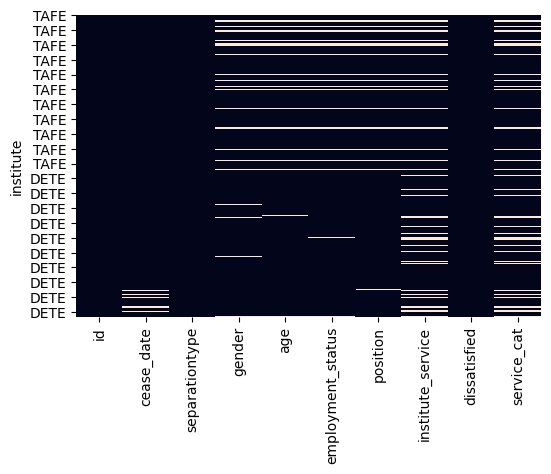

In [84]:
import seaborn as sns
combined_institute = combined_clean.set_index('institute')
sns.heatmap(combined_institute.isnull(), cbar=False)

We can see from the heatmap that there are some patterns to missing values in our combined dataset. There is a clear pattern for rows from the TAFE dataset that containing missing values. Each row has missing information across several columns:
- gender
- age
- employment_status
- position
- institute_service
- service_cat

This being the case, it's probably easiest to just drop these rows rather than attempt to fill the rows with substitute values.

What are our options?

**Option A: substitute missing values**

For all non-numeric columns, replace `NaN` with `Unknown` as we can't reliably estimate what the value should be. For all numeric columns, we substitute the mean value of the column.

**Option B: drop all rows with null values**

Easier of the two options, however if null values make up a significant number of rows in our dataset, it could affect our analysis. Let's figure out what percentage of the total values in each column are missing.

In [85]:
# calculate percentage of missing values in each column
combined_clean.isnull().sum() / len(combined_clean.index) * 100

id                    0.000000
cease_date            2.457757
separationtype        0.000000
gender                9.062980
age                   8.448541
employment_status     8.294931
position              8.141321
institute_service    13.517665
dissatisfied          0.000000
institute             0.000000
service_cat          13.517665
dtype: float64

Looking at the heatmap, it's clear that for the vast majority of rows that contain missing data, this data is almost always missing for the `institute_service` column, and by extension, the `service_cat` column. Given that:
- these columns are essential for our analysis
- we can't reasonbly estimate how long someone has worked either institute
- the highest percentage of null values for any column is `13.5%`

it's probably best to go for option B and drop all rows containing NaN values.

In [86]:
 # Option B - drop all rows containing NaN values
combined_final = combined_clean.copy()
combined_final.dropna(inplace=True)
combined_final.isnull().sum()

id                   0
cease_date           0
separationtype       0
gender               0
age                  0
employment_status    0
position             0
institute_service    0
dissatisfied         0
institute            0
service_cat          0
dtype: int64

To be confident that dropping missing values will not affect our analysis, let's compare the mean of the `dissatisied` column for each category in `service_cat` before and after dropping the missing values.

In [87]:
# pivot table with dataset prior to dropping missing values
combined_clean_pivot = combined_clean.pivot_table(values="dissatisfied", index="service_cat")

# pivot table with dataset after dropping missing values
combined_final_pivot = combined_final.pivot_table(values="dissatisfied", index="service_cat")

# display output
print("Before dropping missing values \n\n", combined_clean_pivot, "\n\n")
print("After dropping missing values \n\n", combined_final_pivot)

Before dropping missing values 

              dissatisfied
service_cat              
Established      0.516129
Experienced      0.343023
New              0.295337
Veteran          0.485294 


After dropping missing values 

              dissatisfied
service_cat              
Established      0.508197
Experienced      0.345029
New              0.298429
Veteran          0.492188


In [88]:
# calculate difference in mean before and after removing null rows
combined_final_pivot - combined_clean_pivot

,dissatisfied
service_cat,
Established,-0.007932
Experienced,0.002006
New,0.003093
Veteran,0.006893


We can see that dropping the rows containing missing values has had a minimal impact on the mean. Now we're ready to start our analysis!

### Recap on data cleaning

To recap, we've accomplished the following: **TODO CHECK ORDER**

- Explored the data and figured out how to prepare it for analysis
- Ensured any missing data was imported as `NaN` rather than `Not stated`
- Standardised the names of our columns across both dataframes
- Dropped any data not needed for our analysis
- Verified the quality of our data
- Combined the data
- Created a new `institute_service` column to indiciate an employee's length of service
- Cleaned the 'contributing factors' columns
- Created a new column indicating if an employee resigned because they were dissatisfied in some way
- Cleaned the `age` column
- Handled the missing values in the `dissatisfied` column
- Handled remaining missing values throughout dataset


## Analysis TO DO

As a reminder, we are trying to answer the following questions:

- are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- are younger employees resigning due to some kind of dissatisfaction? What about older employees?

Let's calculate the percentage of dissatisifed employees in each `service_cat` group. To do this we will use use `df.pivot_table()` to aggregate the `service_cat` column grouped by the mean of the `dissatisifed` column. We know that since `True` equates to a value of `1` and `False` equates to `0`, calculating the mean is equivalent to calcuating the percentage of dissastisfied employees, while calculating the sum is equivalent to counting the number of dissatisfied employees.

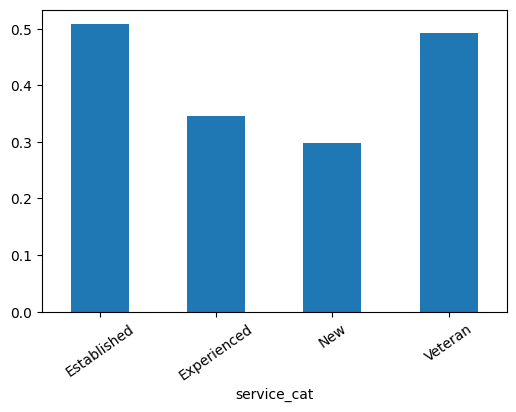

In [89]:
# create bar chart showing mean dissatisfaction for each category
# we can use the pivot table we created earlier
ax = combined_final_pivot.plot(kind="bar", rot=35, legend=False)

The bar plot indicates that resignation due to dissatisfaction increases with length of service, though ever so slightly decreases for `Veteran` level employees. It is reasonable to expect that the longer someone works in the same organisation the more likely they would quit from that organisation as a result of becoming dissatisfied.

On another note, the bar plot above has revealed that the categories within `service_cat` have no defined order, it would be ideal if the categories appeared in order of the length of service they represent. We can change this by utilising Panda's [`CategoricalDtype`](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html#categoricaldtype), a special datatype we can use to define our categories in the order we want. Let's try remaking the above bar plot but this time we will create a `CategoricalDtype` that defines our categories in order, and then convert the values in the `service_cat` column from the `object` dtype to our new `CategoricalDtype`.

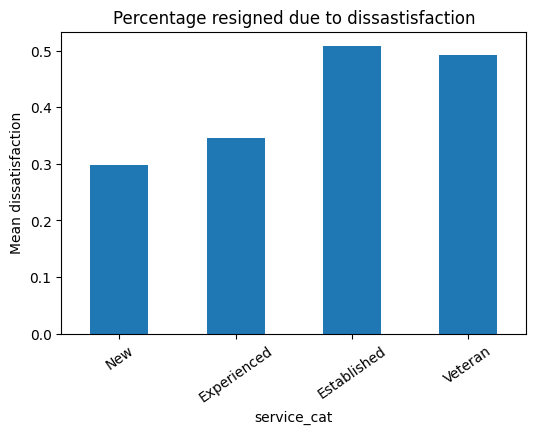

In [90]:
from pandas.api.types import CategoricalDtype

# create a CategoricalDtype that defines the order of our categories
cat_type = CategoricalDtype(categories=["New", "Experienced", "Established", "Veteran"], ordered=True)

# convert the service_cat column dtype to the new CategoricalDtype
combined_final["service_cat"] = combined_final["service_cat"].astype(cat_type)

# create a new pivot table aggregated by the mean and then plot a bar chart
service_pivot = combined_final.pivot_table(values="dissatisfied", index="service_cat", aggfunc=[np.sum, np.mean])
ax = service_pivot["mean"].plot(kind="bar", rot=35, title="Percentage resigned due to dissastisfaction", legend=False)
ax.set_ylabel("Mean dissatisfaction")

plt.show()

Now the categories are in a logical order.

#### How many people in each age group resigned due to some kind of dissatisfaction?
Now let's explore grouping the values of the `dissatisfied` column by the values in the `age` column.

                      mean          sum
              dissatisfied dissatisfied
age                                    
20 or younger     0.200000          2.0
21-25             0.288136         17.0
26-30             0.412698         26.0
31-35             0.383333         23.0
36-40             0.363636         24.0
41-45             0.393258         35.0
46-50             0.402778         29.0
51-55             0.402985         27.0
56-60             0.346939         17.0
61 or older       0.625000         10.0


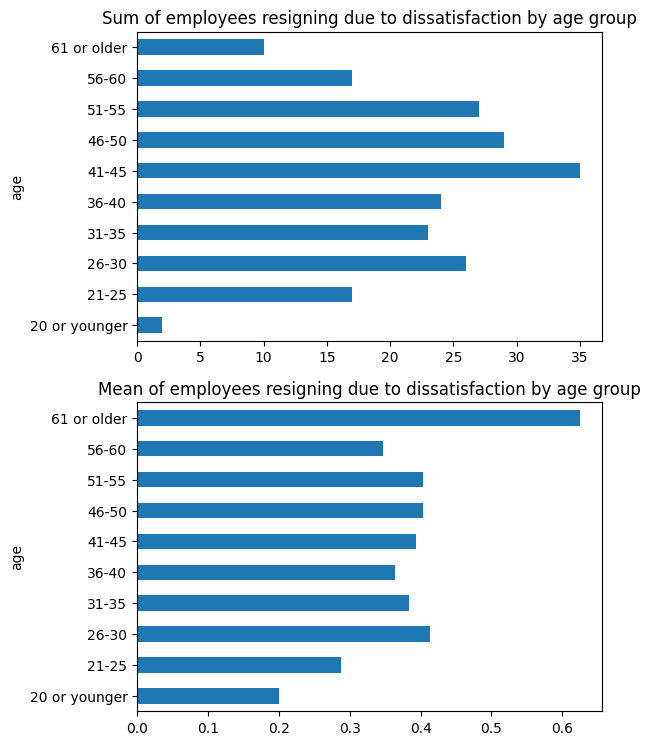

In [91]:
# create and print a pivot table aggregating values by both the mean and the sum
age_pivot = combined_final.pivot_table(values="dissatisfied", index="age", aggfunc=[np.mean, np.sum])
print(age_pivot)

# generate horizontal bar plots using pivot table for both the sum and the mean
fig, axs = plt.subplots(nrows = 2, ncols = 1, figsize = (6, 9))

ax1 = age_pivot["sum"].plot.barh(
                                 ax = axs[0], 
                                 legend=False, 
                                 title="Sum of employees resigning due to dissatisfaction by age group"
                                 )

ax2 = age_pivot["mean"].plot.barh(
                                 ax = axs[1], 
                                 legend=False, 
                                 title="Mean of employees resigning due to dissatisfaction by age group"
                                 )

Looking at the first plot, we can see that the age group with the most resignations due to dissatisfaction the ages `41-45` group. Comparitavely, there are typically fewer resignations towards the oldest and youngest age groups. This doesn't tell the full story, however, as it is likely that there are just more employees in total for the `41-45` age group.

The second plot is much more telling. Recall that by plotting the mean of the `dissatisfied` column we are effectively looking at the percentage of employees who resigned due to dissatisfaction for each age group. We can now see that it is the individuals in the `61 or older` age group who are the most likely to resign due to feeling dissatisfied, accounting for 
`62.5%` of all resignations for the age group. Although the `41-45` age group had the most resignations due to disatisfaciton, this accounted for a smaller percentage (`39%`) of the total resignations for the cohort. 

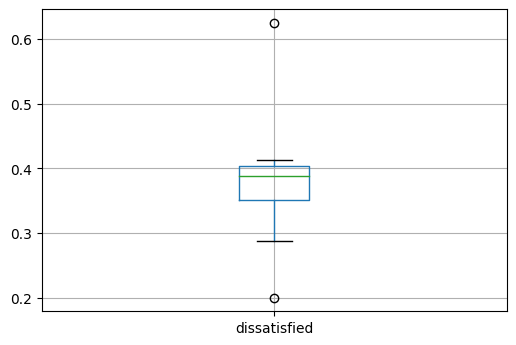

In [92]:
age_pivot["mean"].boxplot()

Looking at this boxplot, we can see that typically around 35 to 40 percent of all resignations are due to dissatisfaction.

### Analysing by DETE or TAFE
Let's see if there is a difference the DETE and TAFE institutes when it comes to measuring the number of employees who resigned due to dissatisfaction.

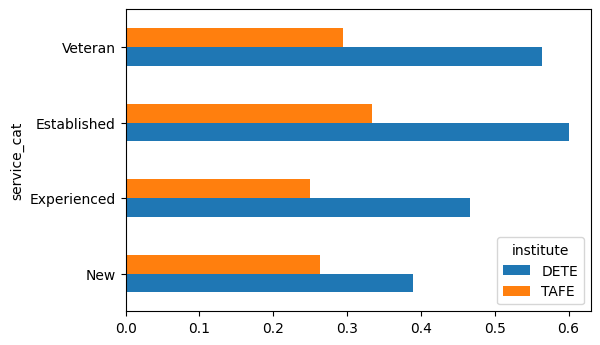

In [93]:
institute_pivot = combined_final.pivot_table(values="dissatisfied", index="service_cat", columns="institute")
institute_pivot.plot.barh()

Interestingly, the plot above reveals to us that former employees of the DETE institute were signfiicantly more dissatisfied than their TAFE counterparts.

## Conclusion
1. are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
2. are younger employees resigning due to some kind of dissatisfaction? What about older employees?

Further investigations
- It is clear that employee dissatisfaction is a greater issue at the DETE institute than the TAFE institute. It would be interesting to explore the possible reasons why this might be the case. We could attempt to identify factors that are unique to DETE that could be contributuing towards dissastisfaction (is the office a poor working environment?) , or perhaps identify factors common to both institutes that have greater impact on (is the average salary lower, shorter lunch breaks etc?)